In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Random Variables

Let $v$ be a random variable.

Expected value $E[v]$ is the mean: 
* $E[v] = \bar{v} = \frac{1}{N}\sum_{1}^{N}v_i$

Expected value of a vector:
* $E[\mathbf{v}] = \mathbf{\bar{v}} = [\bar{x}_1,...,\bar{x}_n]^\top$

Variance is $E[(v-E[v])^2]$:
* $\sigma^2=E[(v-\bar{v})^2]=\frac{1}{N}\sum_{1}^{N}(v_i-\bar{v})^2$

Standard deviation is the square root of variance:
* $\sigma$

Covariance matrix is $E\big[ (\mathbf{x}-E[\mathbf{x}])(\mathbf{x}-E[\mathbf{x}])^{\top} \big]$, size $N \times N$:
* $R_{ij}=\frac{1}{N}\sum_{k=1}^{N}(x_{ik}-\bar{x}_i)(x_{jk}-\bar{x}_j)$
* $R = \mathbf{v} \mathbf{v}^{\top}$

In [4]:
t = np.linspace(0, 6, 2000)

noise_mean = 0
noise_std_1 = 90
v = np.column_stack(np.random.normal(noise_mean, noise_std_1, len(t))).T

In [5]:
N = scipy.stats.norm(noise_mean, noise_std_1)
xr = np.linspace(-300, 300, 1000)
pdf = N.pdf(xr)

# Histogram

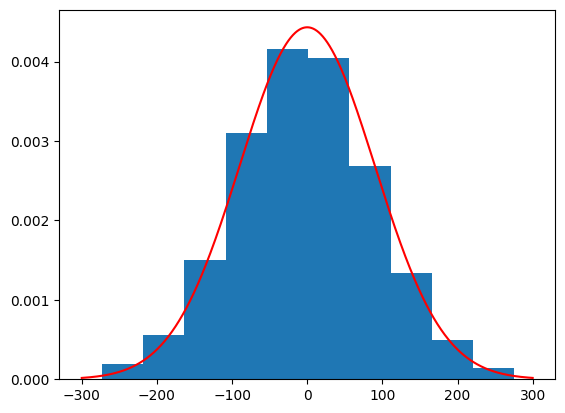

In [6]:
plt.hist(v, density=True)
plt.plot(xr, pdf, color='red')

# Covariance matrix

In [7]:
v = np.column_stack(np.random.normal(noise_mean, noise_std_1, (4,4))).T
print(v@v.T)

[[13256.56385468 11955.26181046  9684.73763564  4931.72554445]
 [11955.26181046 34220.50840378 -4834.07922756  8055.08745224]
 [ 9684.73763564 -4834.07922756 69708.10462587 22883.5996991 ]
 [ 4931.72554445  8055.08745224 22883.5996991  14403.6096458 ]]


In [12]:
R = []

for i in range(100000):
    v = np.column_stack(np.random.normal(noise_mean, noise_std_1, (4,4))).T
    Ri = v@v.T
    R.append(Ri)

In [13]:
Rstack = np.dstack(R)

In [14]:
print( np.mean(Rstack, 2) )

[[ 3.23621691e+04 -2.78007575e+01 -5.47787410e+01 -5.24452896e+01]
 [-2.78007575e+01  3.23728660e+04 -5.40516880e+01  8.56739592e+01]
 [-5.47787410e+01 -5.40516880e+01  3.23862808e+04 -3.07700684e+01]
 [-5.24452896e+01  8.56739592e+01 -3.07700684e+01  3.23153672e+04]]


In [11]:
print( noise_std_1**2*np.eye(4) )

[[8100.    0.    0.    0.]
 [   0. 8100.    0.    0.]
 [   0.    0. 8100.    0.]
 [   0.    0.    0. 8100.]]
